# **Часть I. API**

## **Задание 1. Собираем данные с помощью Requests**

С помощью методов API ВКонтакте получите список высших учебных заведений и названия их факультетов в городе Томск.
Результат должен быть записан в файл JSON в следующем формате:

In [ ]:
"result": {
  "cities": [
    {
        "id": <ID города>,
        "name": <Название города>,
        "universites": [
            {
              "id": <ID ВУЗа>,
              "name": <Название ВУЗа>
              "faculties": [<Название факультета>, …]
            },
            ...
        ]
    },
  ]
    ...
}

In [ ]:
import requests
import json

# Импортируем библиотеку Python requests.

access_token = "cbbffb86cbbffb86cbbffb8668c8a93aacccbbfcbbffb86ae32dbb548a003edee0302af"
method_1 = "database.getCities"
url_1 = f"https://api.vk.com/method/{method_1}"


# Создаем переменные и записываем туда ключ доступа (токен), url api куда будет произвоить запрос и нужный нам метод.

params_1 = {
    "access_token": access_token,
    "country_id": 1,
    "q": "Томск",
    "count": 1,
    "v": 5.199
    }
# Задаем параметры на поиск id города Томска

res_1 = requests.get(url_1, params=params_1).json()

# Проверяем результат. Необходимо res_1 закастить в .json(), так как к полученному методом get объекту НЕЛЬЗЯ ПРИМЕНИТЬ метод get.
# .json() помещает ответ сервера (api) в список, а к нему уже можно применить метод.

if res_1.get("response"):
  cities = []
  items = res_1["response"]["items"]
  if items:
    for item in items:
      cities.append({
          "id": item['id'],
          "name": item['title']
      })

else:
  error_message = res.get("error")
  print(f"ERROR: {error_message}")
# Условный оператор с вложенным циклом на поиск id города, последующая запись данных в список при успешной установке связи и вывод ошибки в случае отсутствия связи.

In [ ]:
access_token = "cbbffb86cbbffb86cbbffb8668c8a93aacccbbfcbbffb86ae32dbb548a003edee0302af"
method_2 = "database.getUniversities"
url_2 = f"https://api.vk.com/method/{method_2}"



params_2 = {
    "access_token": access_token,
    "country_id": 1,
    "city_id": 144,
    "v": 5.199
    }
# Создаем второй get-запрос на поиск ВУЗ города Томска
res_2 = requests.get(url_2, params=params_2).json()

# Создаем условный оператор с вложенным циклом, который проверяет: если связь с сервером есть, то создается список, куда записываются id и title найденных по запросу ВУЗ с помощью цикла. Иначе выдает ошибку.
if res_2.get("response"):
  universities = []
  items = res_2["response"]["items"]
  if items:
    for item in items:
      universities.append({
          "id": item['id'],
          "name": item['title']
      })

else:
  error_message = res.get("error")
  print(f"ERROR: {error_message}")


[{'id': 848, 'name': 'СибГМУ (ТМИ)'}, {'id': 849, 'name': 'ТГАСУ\r\n'}, {'id': 850, 'name': 'ТГПУ\r\n'}, {'id': 851, 'name': 'ТГУ'}, {'id': 852, 'name': 'ТУСУР (бывш. ТАСУР, ТИАСУР)'}, {'id': 853, 'name': 'ТПУ'}, {'id': 2403, 'name': 'ТВМИ'}, {'id': 6255, 'name': 'Филиал РГСУ'}, {'id': 13415, 'name': 'ТЭЮИ'}, {'id': 18292, 'name': 'ТИ Академии ВЭГУ'}, {'id': 20715, 'name': 'ЗСФ РГУП (бывш. ЗСФ РАП)'}, {'id': 23599, 'name': 'ЗСФ РГУИТП'}, {'id': 35214, 'name': 'ТФ СГА'}, {'id': 66758, 'name': 'ТИБ'}, {'id': 75690, 'name': 'ТФ МГГУ им. Шолохова'}, {'id': 118714, 'name': 'ТФ РАНХиГС (бывш. СибАГС ТФ)'}, {'id': 118715, 'name': 'ТФ НГАВТ'}, {'id': 169809, 'name': 'ТВВКУС'}, {'id': 170028, 'name': 'ТСХИ (ф) НГАУ'}, {'id': 245701, 'name': 'ТДС'}, {'id': 401125, 'name': 'ИФПМ СО РАН'}, {'id': 461553, 'name': 'ТИИТ'}, {'id': 499318, 'name': 'Томский ИПКР ФСИН России (бывш. ТФ Кузбасский институт ФСИН)'}, {'id': 573625, 'name': 'ИМКЭС СО РАН'}, {'id': 888642, 'name': 'ИСЭ СО РАН'}, {'id': 116798

In [ ]:
access_token = "cbbffb86cbbffb86cbbffb8668c8a93aacccbbfcbbffb86ae32dbb548a003edee0302af"
method_3 ="database.getFaculties"
url_3 = f"https://api.vk.com/method/{method_3}"

uni_id = []
for i in universities:
  uni_id.append(i["id"])
# создаем список, куда помещаем id университетов, полученные ранее.

for i in uni_id:
    res_3 = requests.get(url_3,params={"access_token": access_token,"university_id": i,"v": 5.199}).json()
# Для каждого значения в списке id университетов производим get-запрос на получение факультетов.
# В api vk методе на получение факультетов можно вводить только одно id университета. Отсюда и необходимость цикла.
    if res_3.get("response") and res_3['response']['count'] != 0:
      faculties_1 = []
      items = res_3["response"]["items"]
# Условный цикл на ответ сервера и обработку пустых значений. Также создаем список факультетов.
      if items:
        for item in items:
          faculties_1.append({

            "name": item['title']
          })
          faculties += faculties_1
      print(faculties)
    else:
      error_message = res_3.get("error")
      print(f"ERROR: {error_message}")

# Третий get-запрос на получение факультетов по найденным и записанным в список id ВУЗ.


[{'name': 'Лечебный факультет'}, {'name': 'Педиатрический факультет'}, {'name': 'Фармацевтический факультет'}, {'name': 'Факультет клинической психологии, психотерапии и социальной работы'}, {'name': 'Факультет управления и экономики в здравоохранении'}, {'name': 'Медико-биологический факультет'}, {'name': 'Факультет высшего сестринского образования'}, {'name': 'Факультет поведенческой медицины и менеджмента'}, {'name': 'Факультет повышения квалификации и профессиональной переподготовки специалистов'}, {'name': 'Отдел ординатуры'}, {'name': 'Институт интегративного здравоохранения'}]
[{'name': 'Механико-технологический факультет'}, {'name': 'Архитектурный факультет'}, {'name': 'Инженерно-экологический факультет'}, {'name': 'Институт кадастра, экономики и инженерных систем в строительстве'}, {'name': 'Дорожно-строительный факультет'}, {'name': 'Общеобразовательный факультет'}, {'name': 'Строительный факультет'}, {'name': 'Институт независимых экспертиз и исследований'}, {'name': 'Инстит

In [ ]:
result = {}






### **Возможный алгоритм решения задачи:**

1.   Получаем токен доступа к API Вконтакте
2.   Настраиваем подключение к API Вконтакте  и устанавливаем базовые параметры (токен и версия) GET запроса

---

3. Следуя методу из документации для получения городов и используя библиотеку requests, составляем запрос на получение информации о городе "Томск" и получаем его id и название из ответа на запрос

---
4. Следуя методу из документации для получения университетов и используя библиотеку requests, составляем запрос на получение информации о университетах города "Томск" (по найденному id) и получаем список университетов
5. Из полученного списка университетов получаем id и название каждого
6. Список id и названия университетов записываем в словарь с информацией о найденном городе под ключем 'universites'
---

7. Находим метод получения факультетов университета в документации API Вконтакте
8. Через цикл по каждому id университета, составляем запрос на получение информации о факультете университета (по найденному id) и получаем список названий факультетов
9. В этом же цикле записываем под ключем 'faculties' полученный список
---
10. Создаем финальный словарь с ключем 'result', значение которого будет еще один словарь 'cities' со значением созданного нами словаря с информацией о городе-университетах-факультетах
11. Записываем наш словарь в  файл с форматом JSON





## **Задание 2. Библиотека VK API**

Напишите код, который получает список названия школ города Кемерово с помощью библиотеки vk_api и записывает результаты в файл JSON.

In [ ]:
# id Кемерово - 64

import vk_api
import requests
import json
# Импортируем нужные библиотеки

access_token = "cbbffb86cbbffb86cbbffb8668c8a93aacccbbfcbbffb86ae32dbb548a003edee0302af"
method = "database.getSchools"
url = f"https://api.vk.com/method/{method}"
# Сохраняем в отдельные переменные токен доступа VK API, метод и URL.

res_1 = requests.get(url,params={"access_token": access_token,"city_id": 64,"v": 5.199}).json()

if res_1.get("response"):
  schools = []
  items = res_1["response"]["items"]
  if items:
    for item in items:
      schools.append({
          "name": item['title']
      })
      with open ("task_2.json", "w") as f:
        result = {"school_list": schools}
        json.dump(result, f)
else:
  error_message = res.get("error")
  print(f"ERROR: {error_message}")
# Делаем запрос в VK API на получение списка школ в городе Кемерово. Праметров немного, поэтому сразу в запросе их прописываем.
# Условный оператор на успешный ответ сервера в отдельный список сохраняет названия школ г. Кемерово. Если ответа нет, то выводится ошибка.
# Внутри цикла на запись в список названий школ прописываем запись полученных данных в .json.


### **Возможный алгоритм решения задачи:**

1.   Получаем токен доступа к API Вконтакте
2.   Инициализируем сессию библиотеки VK_API с помощью токена доступа
3. Получаем доступ с помощью VK_API к API вконтакте методом get_api

4. Следуя методу из документации для получения городов и используя библиотеку VK_API, составляем запрос на получение информации о городе "Кемерово" и получаем его id из ответа на запрос

5. Следуя методу из документации для получения школ и используя библиотеку VK_API, составляем запрос на получение информации о ШКОЛАХ города "Кемерово" (по найденному id) и получаем список названия школ

10. Конкретный формат не указан, поэтому создаем JSON с удобными ключами.<br>Например: result: {schools: [...]}

11. Записываем созданный  словарик  в файл с форматом JSON





## **Задание 3. Запись данных в CSV формат**

С помощью методов API «ВКонтакте» получите 1000 подписчиков группы «Лентач», отсортировать по дате регистрации. *Подсказка: Вам нужно отстортироать подписчиков по **дате регистрации ВКонтакте**, а не дате вступления в сообщество!*

Вам необходимо собрать следующие данные в CSV файл: **пол, название город, семейное положение** (ФИО партнера не указывать).

In [ ]:
!pip install vk_api
# Устанавливаем библиотеку VK API

In [ ]:
import requests
import vk_api
import json
import csv
# Импортируем нужные библиотеки

access_token = "cbbffb86cbbffb86cbbffb8668c8a93aacccbbfcbbffb86ae32dbb548a003edee0302af"
vk_session = vk_api.VkApi(token=access_token)
vk  = vk_session.get_api()
# Сохраняем в отдельную переменную токен доступа, а также инициализируем сессию VK API и получаем к ней доступ.

id_lentach = vk.groups.getById(group_id = "lentach", v = 5.199 )['groups'][0]["id"]
# Получаем с помощью метода groups.getById id сообщества 'Лентач' - 29534144

members_1000 = vk.groups.getMembers(group_id=id_lentach, count=1000, fields="city,relation,sex", v=5.199)['items']
# С помощью метода groups.getMembers получаем информацию о 1000 пользователях сообщества "Лентач"
# Сортировку по дате регистрации я не нашел. Сортировка по дате вступления в сообщество возможна только при вызове от модератора сообщества.

result = []
# Создаем пустой список, куда будем записывать город, статус и пол.

for item in members_1000:
  city_name = item.get('city')
  relation = item.get('relation', 'not_stated')
  sex = item['sex']
# Циклом проходим по нужным ключам. Для ключа СП при пустом значении будет выводится not_stated (не указано)

  if sex == 1:
    sex = 'female'
  elif sex == 2:
    sex = 'male'
  else:
    sex = 'not_stated'

# Условный оператор для словесного обозначения пола. API возвращает цифры, но удобнее читать.
  result.append({
      'city': city_name,
      'relation': relation,
      'sex': sex
  })
# Помещаем все полученные значени в список result. Я НЕ СМОГ ДОСТАТЬ КЛЮЧ 'title' ЗНАЧЕНИЯ 'city'.

with open('task_3.csv', 'w') as f:
  writer = csv.DictWriter(f, fieldnames=result[0].keys())
  writer.writeheader()
  for d in result:
    writer.writerow(d)
# Полученный список result сохраняем в виде .csv файла.

In [ ]:
members_1000 = vk.groups.getMembers(group_id=id_lentach, count=1000, fields="city,relation,sex", v=5.199)['items']
result = []
for item in members_1000:
  city_name = item.get('city')
  result.append({
      'city': city_name
       })
print(result)

[{'city': {'id': 1, 'title': 'Moscow'}}, {'city': {'id': 2, 'title': 'Saint Petersburg'}}, {'city': {'id': 2, 'title': 'Saint Petersburg'}}, {'city': None}, {'city': {'id': 2, 'title': 'Saint Petersburg'}}, {'city': {'id': 2, 'title': 'Saint Petersburg'}}, {'city': {'id': 2, 'title': 'Saint Petersburg'}}, {'city': None}, {'city': None}, {'city': {'id': 2, 'title': 'Saint Petersburg'}}, {'city': {'id': 12, 'title': 'Pushkin'}}, {'city': {'id': 1, 'title': 'Moscow'}}, {'city': {'id': 2, 'title': 'Saint Petersburg'}}, {'city': {'id': 2, 'title': 'Saint Petersburg'}}, {'city': None}, {'city': {'id': 2, 'title': 'Saint Petersburg'}}, {'city': {'id': 60, 'title': 'Kazan'}}, {'city': None}, {'city': {'id': 2, 'title': 'Saint Petersburg'}}, {'city': {'id': 2, 'title': 'Saint Petersburg'}}, {'city': {'id': 1951986, 'title': 'München'}}, {'city': {'id': 2, 'title': 'Saint Petersburg'}}, {'city': {'id': 964, 'title': 'Novomoskovsk'}}, {'city': {'id': 2204899, 'title': 'İstanbul'}}, {'city': {'id'

### **Возможный алгоритм решения задачи:**

1.   Получаем токен доступа к API Вконтакте
2.   Инициализируем сессию библиотеки VK_API с помощью токена доступа
3. Получаем доступ с помощью VK_API к API вконтакте методом get_api

4. Следуя методу из документации для получения сообществ и используя библиотеку VK_API, составляем запрос на получение информации о сообществе "Лентач" и получаем его id из ответа на запрос

5. Следуя методу (getMembers) из документации для получения участников сообщества и используя библиотеку VK_API, составляем запрос на получение информации о участниках сообщества "Лентач" (по найденному id) и **получаем пол, город и СП** каждого из участников

6. С помощью CSV библиотеки записываем полученные данные в файл с форматом csv





# **Часть II. Парсинг**

## **Задание 1. Библиотека BeautifulSoup**

Написать код, который соберет список знаменательных дат в формате «чисто месяц год» с первой страницы сайта GCTC.ru (https://www.gctc.ru/main.php?id=98.1)

In [ ]:
!pip install bs4
# Установки BeautifulSoup4

In [ ]:
import requests
from requests.exceptions import HTTPError
from bs4 import BeautifulSoup
# Импортируем нужные библиотеки

URL = 'https://www.gctc.ru/main.php?id=98.1'
# Создаем глобальную переменную, куда сохраняем url странички
data = []

session = requests.session()
session.headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36 OPR/106.0.0.0 (Edition Yx 05)',
    'accept-language': 'ru-RU,ru;q=0.9,en-US;q=0.8,en;q=0.7'
}
# Инициализируем сессию и вводим явные заголовки-настройки с которыми мы хотим получить данные.

try:
  res = session.get(URL)
  res.raise_for_status()
  html = res.text
# с помощью метода session.get() заходим на сайт, ссылка на который сохранена в глобальной переменной.
# raise_for_status запрос статуса. Если получаем 400 или 500, то выйдет спец исключение HTTPError.
# в переменную html сохраняем страницу в одноименном текстовом формате.

  soup = BeautifulSoup(html, 'lxml')
# Начинаем варить суп. Создаем переменную и в параметры метода помещаем нашу страничку в html формате (текст) и парсер. Для каждого сайта свой парсер!

  main_block = soup.select_one('div.ie_infoh')
# С помощью .select() получаем блок кода, откуда будем доставать месяц и памятные года.

  h2_header = main_block.select('h2')
  for h2 in h2_header:
    h2_clean = h2.text.split('г')[0]
    month_clean = h2.find_previous('h1').text
    data.append([month, h2_clean])
# В переменную h2_header сораняем список h2 заголовков из главного блока
# С помощью цикла проходимся по всем элементам списка h2_header и для каждого элемента списка оставляем только первый элемент (цифры года) с помощью .split()
# В этом же цикле получаем методом .find_previous() предыдущий h1 заголовок, если таковой имеется, и сразу же выделяем text-часть.
# Сохраняем в список полученную информацию

  print(data)
# Проверем...success!

except Exception as ex:
  print(f'ERROR:{ex}')

except HTTPError as ht:
  print(f'ERROR:{ht}')
# Ловим исключения и выводим на экран ошибки.

ERROR:ResultSet object has no attribute 'select'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?


### **Возможный алгоритм решения задачи:**

1. Устанавливаем bs4
2. Здесь lxml неправильно декодирует html в дерево супа (это можно узнать путем проб и ошибок)
3. Устанавливаем любой другой парсер и проверяем, что он нормально декодирует (html5lib подходит)

4. С помощью requests инициализируем сессию, используя указанную ссылку, и устанавливем заголовки
5. Получаем из проинициализированной сессии text и варим суп
6. Получаем главный блок с помощью селектора из которого нужно достать данные
7. Получаем все теги h2, которые содержат год
8. Создаем результативный массив и в цикле по каждому тегу h2 будем записывать в него полученный результат
9. В цикле обрезаем .г у года, Получаем ОДИН h1, который был до div.news h2 с помощью метода find_previous (это и есть день и месяц события)
10. Получаем дату+месяц, где первые два символа это день, а остальные символы это название месяца
11. Записываем все в результативный массив


Не забываем все обернуть в try except и проверять с помощью raise_for_status

## **Задание 2. Скрещиваем Selenium и BeautifulSoup**

Соберите информацию с сайта nbcomputers.ru (https://www.nbcomputers.ru/catalog/noutbuki/) о ноутбуках данного интернет-магазина.
<br>
Данные, которые необходимы:
* Название ноутбука
* Цена ноутбука
* Код товара

Результат необходимо записать в CSV файл.
<br>
*(совет: обязательно делайте различные временные промежутки между прокликами)*

In [ ]:
%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap
# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF
# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg
# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500
Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300
Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF
# Install chromium and chromium-driver
apt-get update
apt-get install chromium chromium-driver
# Install selenium
pip install selenium


Executing: /tmp/apt-key-gpghome.r2nLqXdccf/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.DrXukYDRB2/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.T0Cs5PJWOt/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
gpg: cannot open '/dev/tty': No such device or address
gpg: [stdout]: write error: Broken pipe
gpg: filter_flush failed on c

In [ ]:
'''
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

service = Service(executable_path=r'/usr/bin/chromedriver')
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(service=service, options=options)

driver.quit()
'''

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


chromedriver_path = '/usr/bin/chromedriver'
# Указываем путь к хромдрайверу


options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# Устанавливаем опции Хрома

driver = webdriver.Chrome(service=Service(executable_path=chromedriver_path), options=options)
# Запускаем драйвер

try:
  driver.get('https://www.nbcomputers.ru/catalog/noutbuki/')
  driver.implicitly_wait(10)
# С помощью метода .get() переходим по нужному URL и задаем ожидаение 10 секунд для последующего выхода с ресурса.

  actions = ActionChains(driver)
  actions.move_to_element(driver.find_element(By.CSS_SELECTOR, 'button.sc-47746e2f-0.dIXPjU'))
  actions.perform()
  wait = WebDriverWait(driver, timeout=10)
# Запускаем цепочку действий selenium'a и находим нужный элемент.

  while True:
    wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, 'button.sc-47746e2f-0.dIXPjU'))).click()
# Пока элементы подгружаются, кликаем на элемент.

except Exception as Ex:
  print(f'Error:{Ex}')
# Вывод ошибок и исключений в удобочитаемом формате.

html = driver.page_source
driver.quit()
# Оканчиваем сессию


Error:Message: element click intercepted: Element <button aria-label="Показать ещё больше товаров" class="sc-47746e2f-0 dIXPjU">...</button> is not clickable at point (399, 20). Other element would receive the click: <svg class="sc-5d1faee2-0 hXgbew icon" width="95" height="86" alt="Логотип сайта">...</svg>
  (Session info: headless chrome=90.0.4430.212)
Stacktrace:
#0 0x557d848337f9 <unknown>
#1 0x557d847d33b3 <unknown>
#2 0x557d8451b016 <unknown>
#3 0x557d8455517c <unknown>
#4 0x557d84553654 <unknown>
#5 0x557d8455176c <unknown>
#6 0x557d84550a20 <unknown>
#7 0x557d84546fb9 <unknown>
#8 0x557d84572dc2 <unknown>
#9 0x557d84546d7b <unknown>
#10 0x557d84572fce <unknown>
#11 0x557d845839e1 <unknown>
#12 0x557d84572c93 <unknown>
#13 0x557d84544ce4 <unknown>
#14 0x557d845464d2 <unknown>
#15 0x557d847ff542 <unknown>
#16 0x557d8480ece7 <unknown>
#17 0x557d8480e9e4 <unknown>
#18 0x557d8481313a <unknown>
#19 0x557d8480f5b9 <unknown>
#20 0x557d847f4e00 <unknown>
#21 0x557d848265d2 <unknown>
#22

In [ ]:
from bs4 import BeautifulSoup
import csv

result = []
# Создаем пустой список, куда будем заносить полученные данные.
soup = BeautifulSoup(html, 'lxml')
# Варим суп

cards_list = soup.select_one('section.sc-3dc06944-0.bQBJrx')
card = cards_list.select('div.sc-3dc06944-2.hspFnR')
# Из прогнанного через парсер html-файла достаем нужные тэги: список всех ноутов и каждую карточку товара отдельно.

for name in card:
  codes = name.select_one('p.sc-d9406361-0.fZegtv')
  names = name.select_one('p.sc-d9406361-0.kztjQb')
  prices = name.select_one('span.sc-96470d6e-2')
# С помощью for-цикла достаем из карточки с инфой о ноутбуке код товара, наименование товара, цену товара.

  clean_prod_codes = code.text.split('Код: ')[1]
  clean_prod_names = names.text
  clean_prod_prices = ''.join(prices.text.split()[0:2])
# Чистим полученные данные: у кода оставляем только числовую часть, у наименования буквенное полное наименование, у цены убираем "₽"

  result.append({
      'Product code': clean_prod_codes,
      'Product title': clean_prod_names,
      'Product price': clean_prod_prices
    })
# Данные упаковываем в список.

with open('Task4_laptopsList.csv', 'w') as f:
  writer = csv.DictWriter(f, result[0].keys())
  writer.writeheader()
  for  r in result:
    writer.writerow(r)
# Список извлекаем в формате .csv


Ноутбук Asus VivoBook Pro 14 OLED M3401QA-KM016W 14″/8/SSD 512/синий
Ноутбук Asus VivoBook 15 K513EA-L11139T 15.6″/8/SSD 512/серебристый
Ноутбук Lenovo IdeaPad 3 14ALC6 14″/12/SSD 512/синий
Ноутбук HP Pavilion 15-eg0134ur 15.6″/16/SSD 512/серебристый
Ноутбук MSI Katana GF66 11UC-1225RU 15.6″/8/SSD 512/черный
Ноутбук MSI Raider GE66 12UGS-289RU 15.6″/16/SSD 1024/синий
Ультрабук Huawei MateBook D 16 RLEF-W5651D 16.1″/16/SSD 512/серый
Ноутбук MSI Summit E16 Flip A13VET-097RU 16″/16/SSD 1024/черный
Ноутбук MSI Pulse 17 B13VGK-441RU 17.3″/16/SSD 1024/серый
Ноутбук HONOR MagicBook X16 16″/16/SSD 512/серый
2022 Apple MacBook Air 13.6″ сияющая звезда (Apple M2, 8Gb, SSD 256Gb, M2 (8 GPU))
Ноутбук MSI Creator Z16 Hiroshi Fujiwara 16″/16/SSD 512/черный
Ноутбук Asus Vivobook 15X OLED X1503ZA-L1274 15.6″/8/SSD 512/синий
Ноутбук Asus ROG Strix G15 G513RW-HQ198 15.6″/16/SSD 512/серый
Ультрабук Asus Zenbook 14 OLED UX3402ZA-KM103W 14″/16/SSD 512/зеленый
2022 Apple MacBook Air 13.6″ серый космос (Appl

### **Возможный алгоритм решения задачи в Colab (простой):**

1. Установливаем параметры для headless браузера
2. Инициализацируем сессию браузера
3. Переходим по данной ссылке
4. Устанавливаем неявное ожидание
5. Инициализируем явное ожидание для нажатия на кнопку "Больше"
6. С помощью бесконечного цикла жмем на кнопку методом click, пока она кликабельна  (ну и не забываем про селектор)
4. Оборачиваем все в trt except.Когда вылетит с ошибкой того, что кнопка не кликабельна => прогрузили все карточки

5. С помощью BS находим блок карточек
6. Поочереднно собираем необходимые данные с карточки
7. Записываем все в файл с форматом csv, используя CSV библиотеку



## **Задание 3. Фреймворк Scrapy**

Соберите информацию о заквасках с сайта pro-syr.ru (https://pro-syr.ru/zakvaski-dlya-syra/mezofilnye/)

Необходимо собрать следующие данные:
* Название продукта
* Цена
* Есть ли продукт в наличии

Результат должен быть записан в CSV файл

In [ ]:
import scrapy
import time
#  импортируем нужные библиотеки

class ZakvaskaSpider(scrapy.Spider):
    name = "ZakvaskaSpider"
    start_urls = ["https://pro-syr.ru/zakvaski-dlya-syra/mezofilnye/"]
# Создаем класс, который наследуется от класса Spider. И вводим стартовую ссылку, откуда будем собирать данные.

    def parse(self, response):
        links = response.css("div.nameproduct a::attr(href)")
        for link in links:
            time.sleep(3)
            yield response.follow(link, self.parse_zakv)
# Пишем функцию, которая определяет действия паука: в переменную link помещаем ссылку на карточку, после перехода на которую будет выполняться след. функция.
# В цикле опеределяем таймер задержки действия.

        link = response.css("ul.pagination a::attr(href)")[-2].get()
        yield response.follow(link, self.parse)
# Работа с пагинацией.

    def parse_zakv(self, response):
        yield {
            "Product name": response.css("div.col-md-9.col-sm-12 h1::text").get(),
            "Product price": response.css("span.autocalc-product-price::text").get().split('руб')[0],
            "Product available": response.css("div.product-description b::text").get()

        }
# Вторая функция, которая собирает нужные данные в словарь.
# Программу писал в IDE PyCharm, а также использовал scrapy shell.

### **Возможный алгоритм решения задачи:**

1. Инициализируем проект SCRAPY
2. В папке spiders создаем своего паука
3. Создаем класс с пауком и наследуемся от scrapy.Spider
4. Называем паука так же, как и класс
5. Указываем стартовую ссылку
6. Создаем функцию парсинга карточки, где описываем получение данных из карточки в словарь (название, цена и запас). Возвращаем обратно словарь через yield.
7. Создаем функцию parse - основую логику перехода по ссылкам
8. Получаем ссылки на каждую карточек текущей страницы
9. Циклом проходимся по каждой и собираем данные через ранне коллбек функцию
10. Дальше в функции parse расписываем переход на следующую страницу. Для этого находим в пагинации ссылку на следующую страницу  и переходим на нее до тех пор, пока она не закончится.
11. В командной строке переходим в папку с проектом scrapy (%cd <название проекта>/)
12. В командной строке пишем команду !scrapy runspider <название паука или путь до него из папки с проектом> -o <Название файла с форматом csv, куда будет записан результат парсинга>


Не забывайте пользоваться scrapy shell!

# **Часть III. Дополнительная тренировка (по желанию)**

## **Задание 1. Библиотека BeautifulSoup**

Собрать информацию о товарах данного интернет-магазина мягких игрушек tomsk.richfamily.ru (https://tomsk.richfamily.ru/catalog/igrushki/myagkie/)

Вам необходимо получить следующие данные о каждой мягкой игрушке:
* Название
* Цена
* Размер (сантиметры)

Необходимо собрать данные со всех страниц!!
Результаты должны быть записаны в CSV файл

### **Возможный алгоритм решения задачи:**

1. Устанавливаем bs4
2. Изучаем работу пагинации и видим, что при переходе на страницы в URL изменяается параметр PAGEN_1
3. Изменяем ссылку, добавив в нее параметр PAGEN_1, который будет подставляться форматной вставкой

4. С помощью requests инициализируем сессию, используя измененную ссылку, с подсталвенным туда первым номером страницы, и устанавливем заголовки
5. Получаем из проинициализированной сессии text и варим суп
6. Создаем резульативный массив, в который будем все записывать
7. Получаем все карточки с помощью селектора
8. Находим и записываем дату
9. Находим и записываем название
10. Находим и записываем место
11. Записываем полученное в результативный массив

12. Получаем инфу о последнем номере страницы из пагинации

13. Далее циклом по всем страницам повторяем полученное и дополняем результативный массив

14. С помощью библиотеки CSV записываем полученное в файл с форматом csv



Не забываем все обернуть в try except и проверять с помощью raise_for_status

## **Задание 2. Библиотека BeautifulSoup**

Соберите информацию о  происходивших выставках кошек с сайта RU-pets.ru <br>(http://ru-pets.ru/index.php?m=6&c=2&to=1).

Данные, которые необходимы:
* Дата проведения
* Название выставки
* Клуб-Организатор
<br>

Результат необходимо записать в CSV файл

## **Задание 3. Скрещиваем Selenium и BeautifulSoup**

Написать код, который выполнит ввод слова "Lenovo" в поисковую строку сайта  1000kem.ru (https://1000kem.ru/contacts/) и выполнить поиск
<br>
<br>
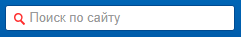


*(подсказка: изучите внимательно документацию и методы wait.until, click или send_keys)*

### **Возможный алгоритм решения задачи в Colab (простой):**

1. Установливаем параметры для headless браузера
2. Инициализацируем сессию браузера
3. Переходим по данной ссылке
4. Находим элемент по селектору
5. С помощью метода send_keys и \n в конце строки (\n имитирует нажатие кнопки Enter) выполняем поиск

Более сложный  и верный с использованием ожиданий

## **Задание 4. Скрещиваем Selenium и BeautifulSoup**

Написать код, который выполнит ввод слова "Lenovo" в поисковую строку сайта  nbcomputers.ru (https://www.nbcomputers.ru/) и нажмет кнопку "Найти"
<br>
<br>
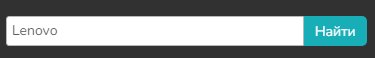

*(подсказка: изучите внимательно документацию и методы wait.until, click или send_keys)*

## **Задание 5. Скрещиваем Selenium и BeautifulSoup**

Соберите информацию с сайта nbcomputers.ru (https://1000kem.ru/catalog/vse_dlya_doma_1/) о домашней утвари данного интернет-магазина.
<br>
Данные, которые необходимы:
* Название товара
* Цена

Так же данные должны быть отсортированы по уменьшению цены.
<br>
Результат необходимо записать в CSV файл.
<br>
*(совет: посмотрите в документации метод execute_script - с помощью него и языка JS можно выполнить клик по кнопке)*

## **Задание 6. Фреймворк Scrapy**

Соберите информацию о подарочных наборах сайта siberia.eco (https://siberia.eco/gotovye-podarki/)

Необходимо собрать следующие данные:
* Название набора
* Цена
* Состав набора

Результат должен быть записан в CSV файл